In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [17]:
def process_report_line(line):
    parts = line.split(" ")
    if parts[0][0] == "q":
        parts = filter(lambda p: p != "use-index", parts)
        name = parts[0]
        params = { k:v.strip() for k,v in
                  map(lambda kv: kv.split("="), parts[1:])}
        params['cls'] = True if params['cls'] else False
        params['projection'] = True if params.get('projection', False) else False
        params['query'] = name
        run_keys = []
        for key in params:
            if re.match('run', key):
                run_keys.append(key)
        assert len(run_keys) == 1
        run_key = run_keys[0]
        params["secs"] = float(params[run_key])
        assert not params.has_key("run")
        params["run"] = run_key
        del params[run_key]
        return params
    return None

def getdf(fn):
    with open(fn, 'r') as f:
        results = filter(None, map(process_report_line, f.readlines()))
        return pd.DataFrame(results)

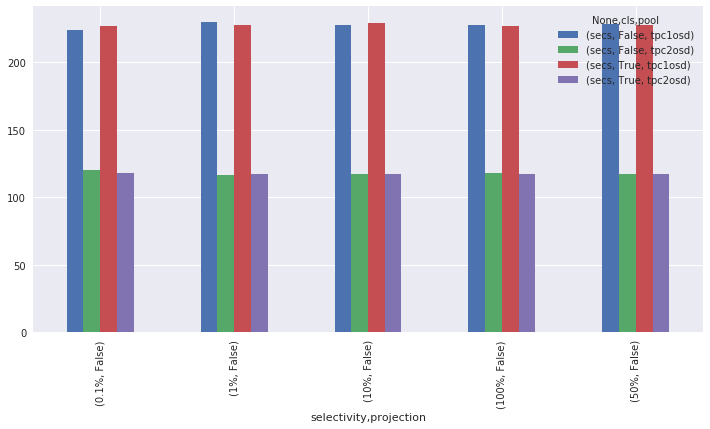

In [122]:
df = getdf('all-run.log')
# only report run2
df = df[df["run"] == 'run2']

df[df["query"] == "qa"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2]).plot.bar(figsize=(12,6))

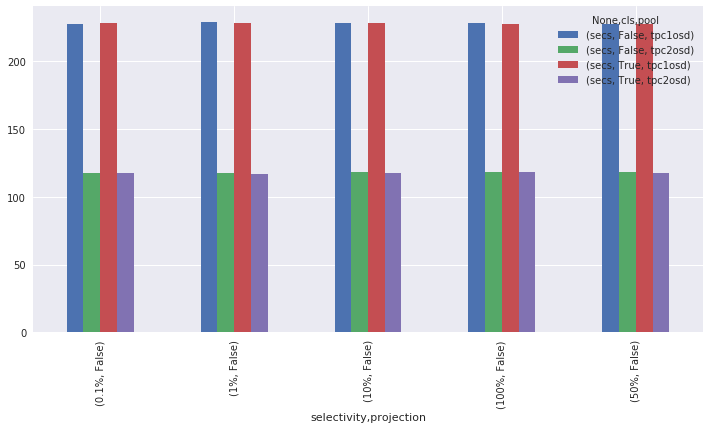

In [123]:
df[df["query"] == "qb"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2]).plot.bar(figsize=(12,6))

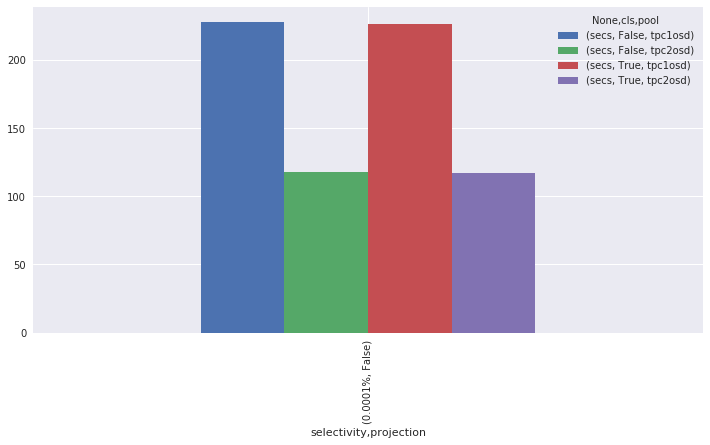

In [124]:
df[df["query"] == "qc"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2]).plot.bar(figsize=(12,6))

In [127]:
df[df["query"] == "qd"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2])#.plot.bar(figsize=(12,6))

secs                                    
cls                          False                   True             
pool                       tpc1osd     tpc2osd     tpc1osd     tpc2osd
selectivity projection                                                
unique      False       228.828828  117.615958  229.867479  118.240403
unique-with False              NaN         NaN    0.388148    0.305161

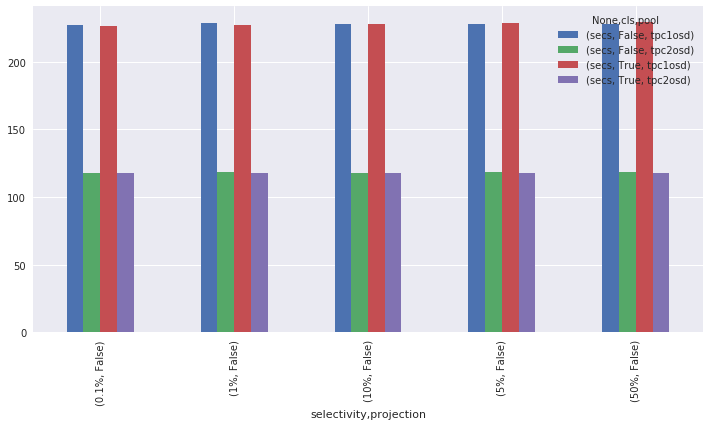

In [130]:
df[df["query"] == "qe"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2]).plot.bar(figsize=(12,6))

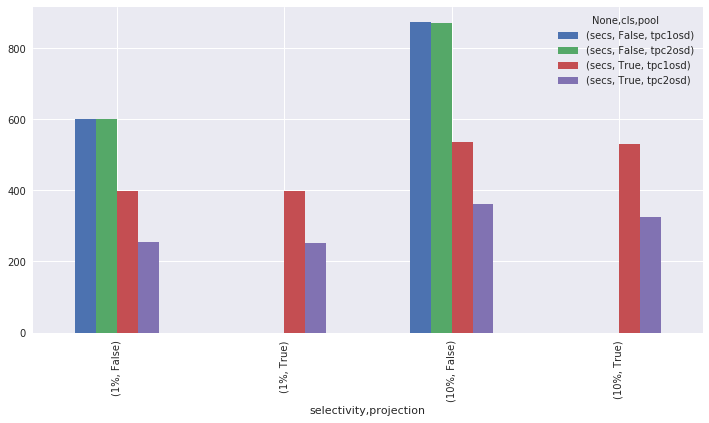

In [131]:
df[df["query"] == "qf"].groupby(['selectivity', 'cls', 'pool', 'projection']).sum().unstack([1,2]).plot.bar(figsize=(12,6))